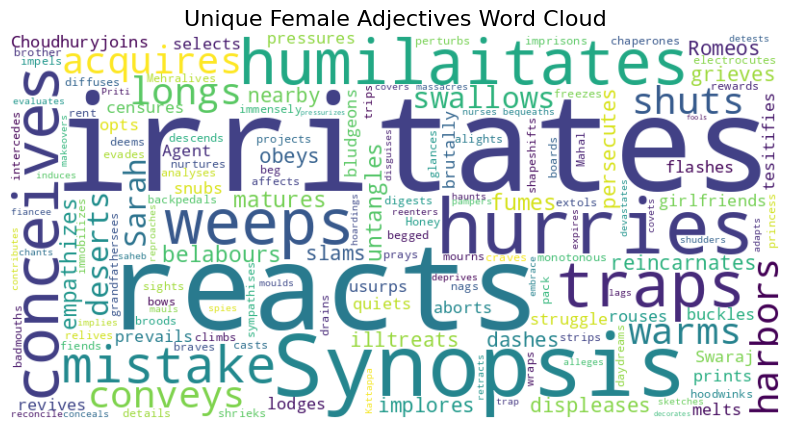

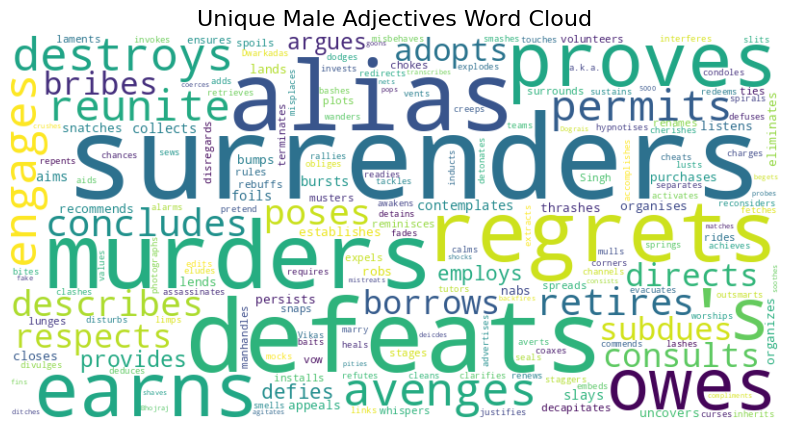

In [10]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to process the adjectives from a CSV file
def process_adjectives(input_file_path):
    # Step 1: Convert the first comma in each line to a tab
    output_file_path = input_file_path.replace('.csv', '_tab.csv')
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        for line in infile:
            # Replace only the first comma with a tab
            outfile.write(line.replace(',', '\t', 1))

    # Step 2: Load the modified tab-separated file
    data = pd.read_csv(output_file_path, sep='\t', header=None, names=["Year", "Adjectives"], engine='python')

    # Step 3: Preprocess the Adjectives column to extract the content inside square brackets
    adjectives_list = []
    for entry in data["Adjectives"]:
        # Extract content inside square brackets
        matches = re.findall(r'\[([^\[\]]*)\]', str(entry))
        for match in matches:
            # Split by commas only if there are multiple adjectives
            cleaned_words = [word.strip() for word in match.split(',') if word.strip()]
            adjectives_list.extend(cleaned_words)

    return adjectives_list

# Process both files
female_adjectives = process_adjectives('wikipedia-data/female_verb.csv')
male_adjectives = process_adjectives('wikipedia-data/male_verb.csv')

# Count the frequency of each adjective for both lists
female_counts = Counter(female_adjectives)
male_counts = Counter(male_adjectives)

# Step 4: Find unique adjectives between the two lists
female_unique = {adjective: count for adjective, count in female_counts.items() if adjective not in male_counts}
male_unique = {adjective: count for adjective, count in male_counts.items() if adjective not in female_counts}

# Step 5: Generate the word cloud for female unique adjectives
female_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(female_unique)

# Step 6: Plot the female word cloud
plt.figure(figsize=(10, 5))
plt.imshow(female_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Unique Female Adjectives Word Cloud", fontsize=16)
plt.show()

# Step 7: Generate the word cloud for male unique adjectives
male_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(male_unique)

# Step 8: Plot the male word cloud
plt.figure(figsize=(10, 5))
plt.imshow(male_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Unique Male Adjectives Word Cloud", fontsize=16)
plt.show()


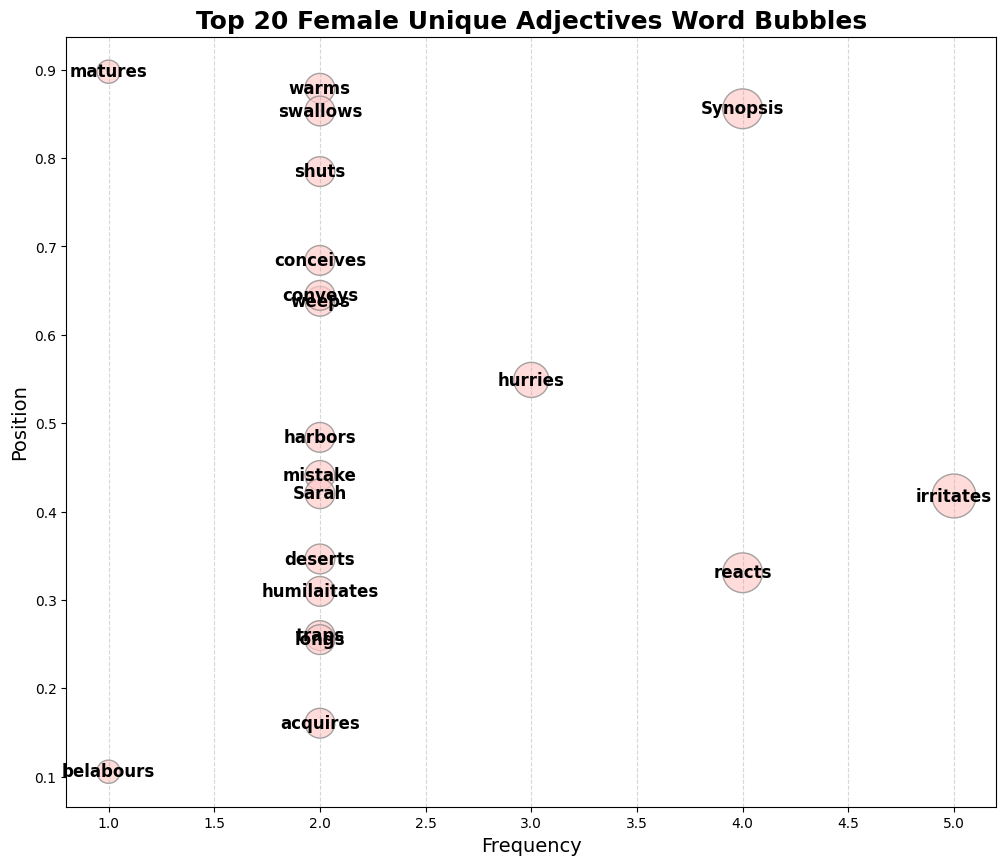

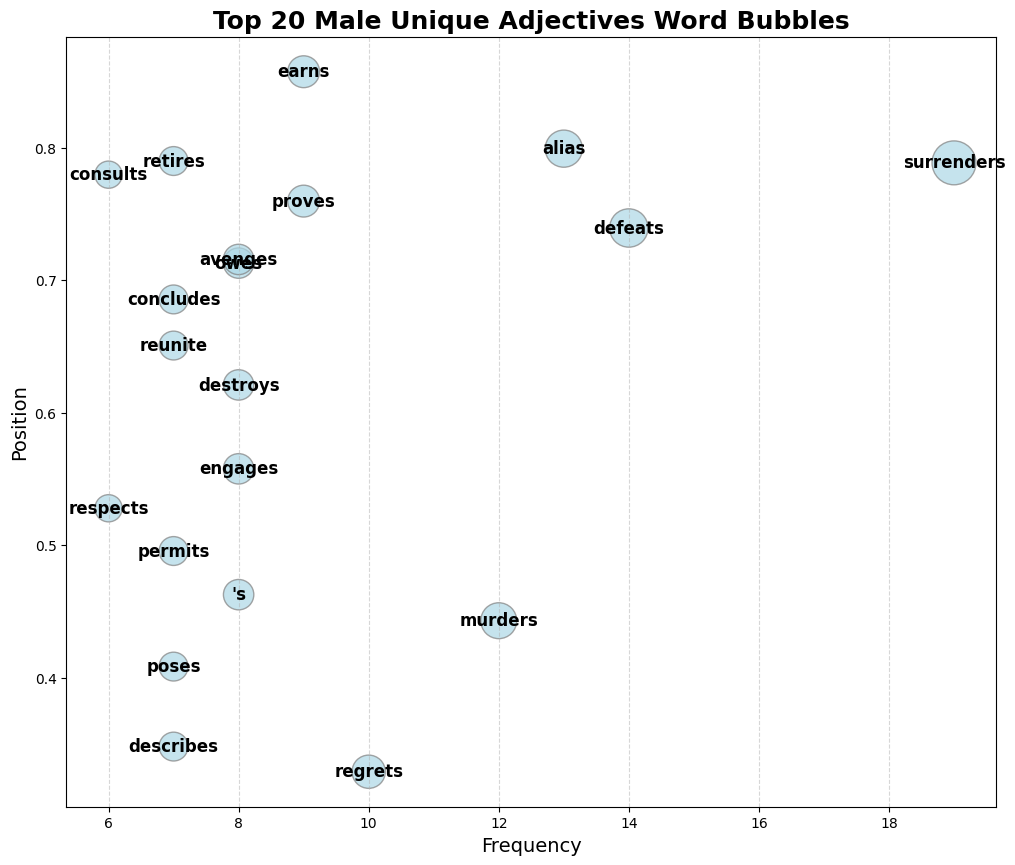

In [22]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import re

# Function to convert the first comma into a tab in the CSV file
def convert_comma_to_tab(input_file_path, output_file_path):
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        for line in infile:
            # Replace only the first comma with a tab
            outfile.write(line.replace(',', '\t', 1))

# Function to plot the word bubble chart with frequency on x-axis and random y-axis positioning
def plot_word_bubbles(words, counts, title="Word Bubbles", color='#FFCCCB'):  # Light red default
    # Set random positions on the y-axis, but use frequency (count) for the x-axis
    num_words = len(words)
    x = counts  # Use the counts as the x-coordinate (frequency of the word)
    y = np.random.uniform(0.1, 0.9, num_words)  # Spread words randomly on the y-axis
    
    # Logarithmic scaling of bubble size based on frequency (to avoid dominance of large bubbles)
    max_count = max(counts)
    min_count = min(counts)
    
    # Apply scaling with a minimum size of 100 and max size of 1000
    sizes = [100 + (count / max_count) * 900 for count in counts]  # Size scaling
    
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(x, y, s=sizes, alpha=0.7, color=color, edgecolors='gray', linewidth=1)  # Plot bubbles

    # Annotate each word on the bubble
    for i, word in enumerate(words):
        plt.text(x[i], y[i], word, fontsize=12, ha='center', va='center', color='black', fontweight='bold')

    # Title and styling
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Position", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.5)  # Grid for x-axis to help see frequency distribution
    plt.show()

# Function to extract adjectives from the Adjectives column
def extract_adjectives(data):
    adjectives_list = []
    for entry in data["Adjectives"]:
        # Extract content inside square brackets
        matches = re.findall(r'\[([^\[\]]*)\]', str(entry))
        for match in matches:
            # Split by commas only if there are multiple adjectives
            cleaned_words = [word.strip() for word in match.split(',') if word.strip()]
            adjectives_list.extend(cleaned_words)
    return adjectives_list

# Function to get unique words in one dataset (adjectives in one but not the other)
def get_unique_to_dataset(word_counts, other_word_counts):
    # Get words that appear in word_counts but not in other_word_counts
    unique_words = {word: count for word, count in word_counts.items() if word not in other_word_counts}
    return unique_words

# Function to get the top N words based on frequency
def get_top_words(word_counts, top_n=20):
    # Sort the words by frequency and get the top N words
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_words, top_counts = zip(*sorted_words[:top_n])  # Unzip into two lists: words and counts
    return top_words, top_counts

# File paths for the original CSV files
female_file_path = 'wikipedia-data/female_verb.csv'
male_file_path = 'wikipedia-data/male_verb.csv'

# File paths for the output CSV files after conversion
female_output_path = 'wikipedia-data/female_verb_tab.csv'
male_output_path = 'wikipedia-data/male_verb_tab.csv'

# Step 1: Convert first comma to tab for both female and male files
convert_comma_to_tab(female_file_path, female_output_path)
convert_comma_to_tab(male_file_path, male_output_path)

# Step 2: Read the modified tab-separated files
female_data = pd.read_csv(female_output_path, sep='\t', header=None, names=["Year", "Adjectives"])
male_data = pd.read_csv(male_output_path, sep='\t', header=None, names=["Year", "Adjectives"])

# Step 3: Extract adjectives from both female and male data
female_adjectives = extract_adjectives(female_data)
male_adjectives = extract_adjectives(male_data)

# Count the frequency of each adjective
female_adjective_counts = Counter(female_adjectives)
male_adjective_counts = Counter(male_adjectives)

# Step 4: Get the unique words for each dataset (adjectives unique to female and male)
female_unique = get_unique_to_dataset(female_adjective_counts, male_adjective_counts)
male_unique = get_unique_to_dataset(male_adjective_counts, female_adjective_counts)

# Step 5: Get the top 20 unique words for each dataset
female_top_words, female_top_counts = get_top_words(female_unique, top_n=20)
male_top_words, male_top_counts = get_top_words(male_unique, top_n=20)

# Step 6: Plot the word bubble charts for top 20 unique female and male adjectives with frequency on x-axis
plot_word_bubbles(female_top_words, female_top_counts, title="Top 20 Female Unique Adjectives Word Bubbles", color='#FFCCCB')  # Light red
plot_word_bubbles(male_top_words, male_top_counts, title="Top 20 Male Unique Adjectives Word Bubbles", color='#ADD8E6')  # Light blue


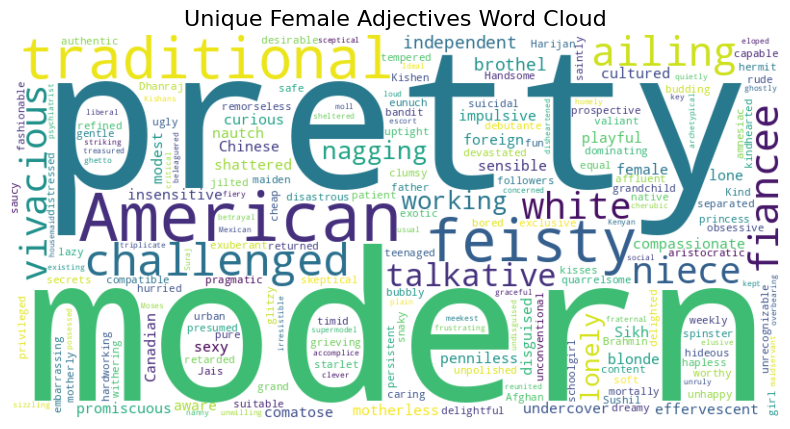

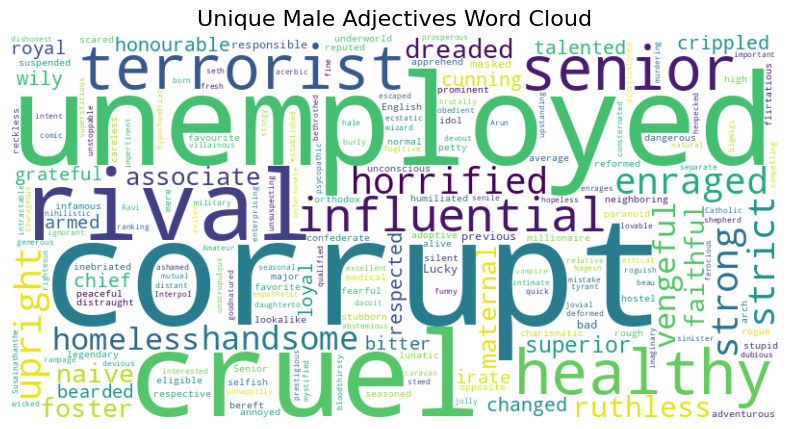

In [23]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to convert the first comma in each line to a tab in the CSV file
def convert_comma_to_tab(input_file_path, output_file_path):
    with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
        for line in infile:
            # Replace only the first comma with a tab
            outfile.write(line.replace(',', '\t', 1))

# Function to extract adjectives from the Adjectives column
def extract_adjectives(data):
    adjectives_list = []
    for entry in data["Adjectives"]:
        # Extract content inside square brackets
        matches = re.findall(r'\[([^\[\]]*)\]', str(entry))
        for match in matches:
            # Split by commas only if there are multiple adjectives
            cleaned_words = [word.strip() for word in match.split(',') if word.strip()]
            adjectives_list.extend(cleaned_words)
    return adjectives_list

# Function to get unique words in one dataset (adjectives in one but not the other)
def get_unique_to_dataset(word_counts, other_word_counts):
    # Get words that appear in word_counts but not in other_word_counts
    unique_words = {word: count for word, count in word_counts.items() if word not in other_word_counts}
    return unique_words

# Function to generate a word cloud from adjective frequencies
def generate_wordcloud(adjective_counts, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(adjective_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# File paths for the female and male datasets
female_file_path = 'wikipedia-data/female_adjectives.csv'
male_file_path = 'wikipedia-data/male_adjectives.csv'

# File paths for the output CSV files after conversion
female_output_path = 'wikipedia-data/female_adjectives_tab.csv'
male_output_path = 'wikipedia-data/male_adjectives_tab.csv'

# Step 1: Convert first comma to tab for both female and male files
convert_comma_to_tab(female_file_path, female_output_path)
convert_comma_to_tab(male_file_path, male_output_path)

# Step 2: Load the modified tab-separated files
female_data = pd.read_csv(female_output_path, sep='\t', header=None, names=["Year", "Adjectives"])
male_data = pd.read_csv(male_output_path, sep='\t', header=None, names=["Year", "Adjectives"])

# Step 3: Extract adjectives from both female and male data
female_adjectives = extract_adjectives(female_data)
male_adjectives = extract_adjectives(male_data)

# Count the frequency of each adjective
female_adjective_counts = Counter(female_adjectives)
male_adjective_counts = Counter(male_adjectives)

# Step 4: Get the unique words for each dataset (adjectives unique to female and male)
female_unique = get_unique_to_dataset(female_adjective_counts, male_adjective_counts)
male_unique = get_unique_to_dataset(male_adjective_counts, female_adjective_counts)

# Step 5: Generate word clouds for the unique adjectives (female unique and male unique)
generate_wordcloud(female_unique, title="Unique Female Adjectives Word Cloud")
generate_wordcloud(male_unique, title="Unique Male Adjectives Word Cloud")


<Figure size 1200x800 with 0 Axes>

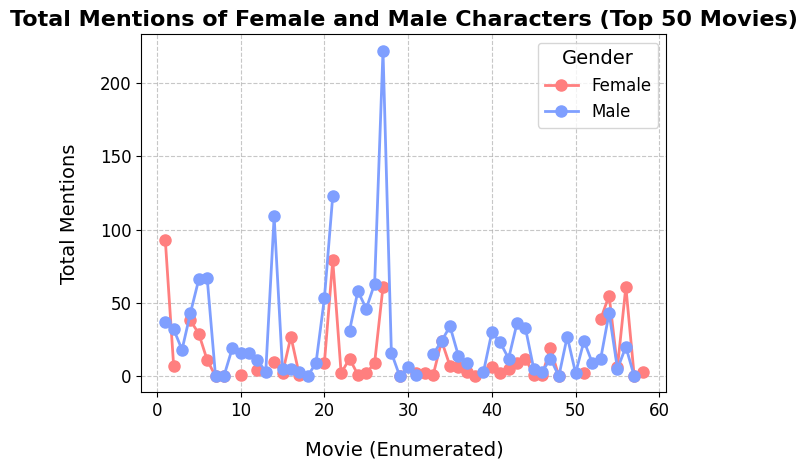

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the male and female datasets
male_data = pd.read_csv('wikipedia-data/male_mentions_centrality.csv')  # Update the file path if necessary
female_data = pd.read_csv('wikipedia-data/female_mentions_centrality.csv')  # Update the file path if necessary

# Step 1: Strip any leading/trailing spaces from column names
male_data.columns = male_data.columns.str.strip()
female_data.columns = female_data.columns.str.strip()

# Step 2: Select the relevant columns from both datasets
male_data_selected = male_data[['MOVIE NAME', 'CAST', 'MENTIONS']].copy()
female_data_selected = female_data[['MOVIE NAME', 'CAST', 'MENTIONS']].copy()

# Step 3: Add a 'Gender' column to both datasets
male_data_selected['Gender'] = 'Male'
female_data_selected['Gender'] = 'Female'

# Step 4: Combine the datasets
combined_data = pd.concat([male_data_selected, female_data_selected], ignore_index=True)

# Step 5: Group by 'Movie Name' and 'Gender' and sum the mentions
grouped_data = combined_data.groupby(['MOVIE NAME', 'Gender'])['MENTIONS'].sum().reset_index()

# Step 6: Take only the first 50 movies
grouped_data = grouped_data.head(100)

# Step 7: Pivot the data so that 'Movie Name' is on the x-axis, with 'Female' and 'Male' mentions as columns
pivoted_data = grouped_data.pivot(index='MOVIE NAME', columns='Gender', values='MENTIONS')

# Step 8: Enumerate the movie names (replace movie names with numbers)
pivoted_data.index = range(1, len(pivoted_data) + 1)

# Step 9: Plot the data as a line graph with improved aesthetics
plt.figure(figsize=(12, 8))

# Plotting the data as lines
ax = pivoted_data.plot(kind='line', marker='o', color=['#FF7F7F', '#7F9FFF'], linewidth=2, markersize=8)

# Adding labels and title with better font sizes
plt.title('Total Mentions of Female and Male Characters (Top 50 Movies)', fontsize=16, weight='bold')
plt.xlabel('Movie (Enumerated)', fontsize=14, labelpad=15)
plt.ylabel('Total Mentions', fontsize=14, labelpad=15)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

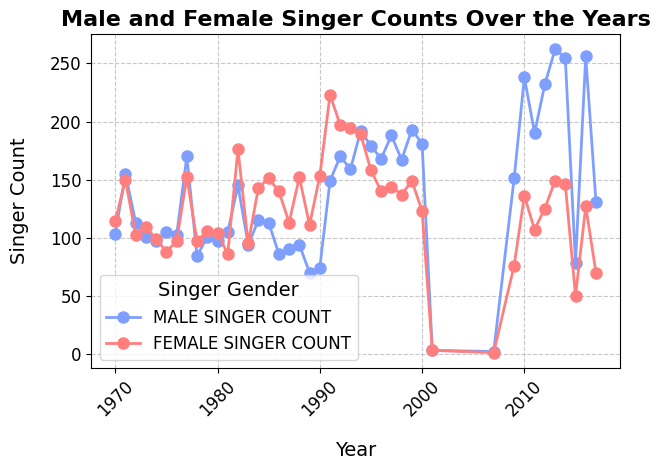

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('wikipedia-data/songsFrequency.csv')  # Replace 'your_file.csv' with your actual file path

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 1: Select relevant columns (YEAR, MALE SINGER COUNT, FEMALE SINGER COUNT)
singer_data = data[['YEAR', 'MALE SINGER COUNT', 'FEMALE SINGER COUNT']].copy()

# Step 2: Group by 'YEAR' and sum the singer counts for each year
yearly_data = singer_data.groupby('YEAR').sum()

# Step 3: Plot the data
plt.figure(figsize=(12, 8))

# Plotting male and female singer counts over the years
yearly_data.plot(kind='line', marker='o', color=['#7F9FFF', '#FF7F7F'], linewidth=2, markersize=8)

# Adding labels and title with improved font sizes
plt.title('Male and Female Singer Counts Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Singer Count', fontsize=14, labelpad=15)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Singer Gender', fontsize=12, title_fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


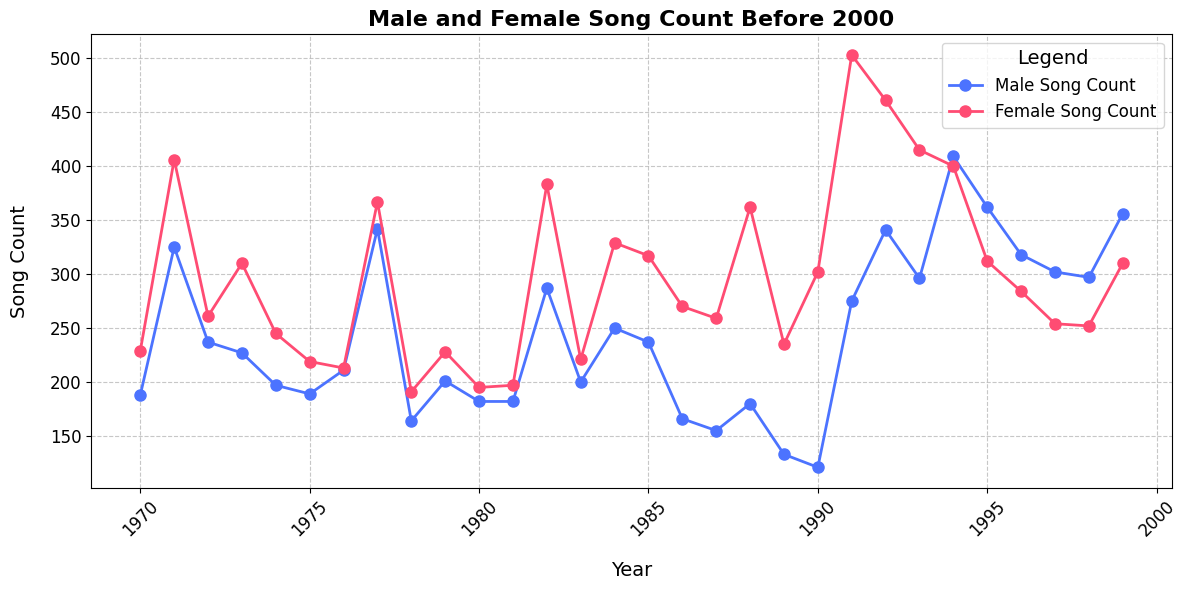

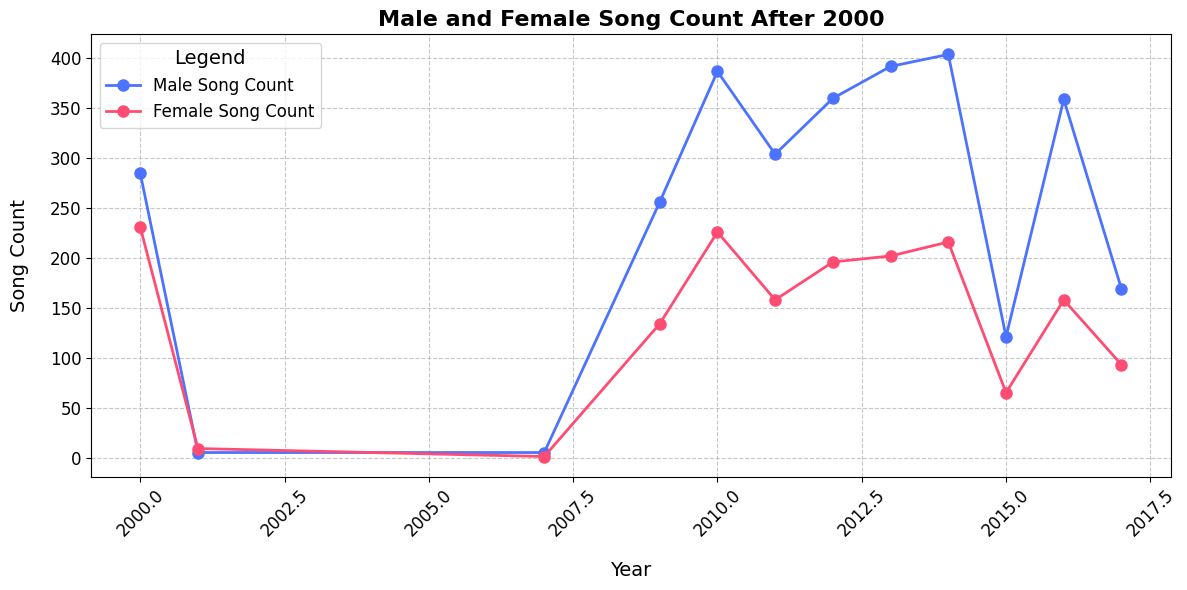

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('wikipedia-data/songsFrequency.csv')  # Replace 'your_file.csv' with your actual file path

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 1: Select relevant columns (YEAR, MALE SONG COUNT, FEMALE SONG COUNT)
song_data = data[['YEAR', 'MALE SONG COUNT', 'FEMALE SONG COUNT']].copy()

# Step 2: Group by 'YEAR' and sum the song counts for males and females
yearly_data = song_data.groupby('YEAR').sum()

# Step 3: Split the data into two datasets: one for before 2000 and one for after 2000
before_2000 = yearly_data[yearly_data.index < 2000]
after_2000 = yearly_data[yearly_data.index >= 2000]

# Step 4: Plotting for before 2000
plt.figure(figsize=(12, 6))
plt.plot(before_2000.index, before_2000['MALE SONG COUNT'], label='Male Song Count', marker='o', color='#4C73FF', linewidth=2, markersize=8)
plt.plot(before_2000.index, before_2000['FEMALE SONG COUNT'], label='Female Song Count', marker='o', color='#FF4C73', linewidth=2, markersize=8)
plt.title('Male and Female Song Count Before 2000', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Song Count', fontsize=14, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Plotting for after 2000
plt.figure(figsize=(12, 6))
plt.plot(after_2000.index, after_2000['MALE SONG COUNT'], label='Male Song Count', marker='o', color='#4C73FF', linewidth=2, markersize=8)
plt.plot(after_2000.index, after_2000['FEMALE SONG COUNT'], label='Female Song Count', marker='o', color='#FF4C73', linewidth=2, markersize=8)
plt.title('Male and Female Song Count After 2000', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, labelpad=15)
plt.ylabel('Song Count', fontsize=14, labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Inference from Male and Female Song Counts in Bollywood (1970-2010)

Examining Bollywood's song counts from 1970 to 2010 reveals an intriguing shift in the gender of playback singers:

- **Before 2000**: Female singers were more prominent in the industry, leading the charts with iconic voices like Lata Mangeshkar, Asha Bhosle, and Kishori Amonkar. This period was marked by romantic, melodic songs, often sung by women, which reflected traditional gender roles where women were associated with softer, emotional, and melodic expressions in music.

- **After 2000**: The trend shifted, with male singers taking the lead in song counts. Artists like Sonu Nigam, Udit Narayan, and Arijit Singh became household names, particularly with the rise of more energetic, fast-paced tracks. This shift can also be seen as part of a larger trend where Bollywood songs increasingly featured male voices in dance numbers, which were often more commercial and mainstream.

### Gender Stereotypes and the Shift

1. **Traditional Gender Roles**: The earlier dominance of female singers in Bollywood reflected gender stereotypes that cast women as the primary voices of love, longing, and emotion. Women were often portrayed as delicate, romantic figures in film, which aligned with the soft, melodic songs they were given.

2. **Changing Cinematic Trends**: The rise of male singers post-2000 can be linked to changes in Bollywood music, where high-energy, fast-paced songs began to take center stage. These songs, often associated with male protagonists or bold, commercial themes, led to an increase in male-led soundtracks. This shift may also reflect societal changes where men began to take more dominant roles in entertainment and media, both in terms of screen presence and vocal dominance.

3. **Challenging the Norms**: The dominance of male singers in the 2000s highlights the evolving nature of gender norms in Bollywood. While women were historically the voices of emotion, the industry's musical landscape became more inclusive of male voices, perhaps reflecting changing perceptions of masculinity and power in Bollywood storytelling.

In [1]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Keywords for identifying gender-based stereotypes
male_keywords = ["he", "him", "his", "son", "father", "businessman", "owner", "leader", "hero"]
female_keywords = ["she", "her", "daughter", "wife", "mother", "beautiful", "emotional", "dependent"]

# Function to analyze and suggest changes in plot snippets
def analyze_and_suggest_changes(plot):
    doc = nlp(plot)
    suggestions = []
    characters = {}
    
    # Extract character information
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if ent.text not in characters:
                characters[ent.text] = {"gender": None, "roles": []}

    # Analyze sentences
    for sent in doc.sents:
        tokens = nlp(sent.text)
        for token in tokens:
            # Check for gender pronouns
            if token.text.lower() in male_keywords:
                # Assign gender as male to nearby characters
                for ent in sent.ents:
                    if ent.label_ == "PERSON":
                        characters[ent.text]["gender"] = "male"
            elif token.text.lower() in female_keywords:
                # Assign gender as female to nearby characters
                for ent in sent.ents:
                    if ent.label_ == "PERSON":
                        characters[ent.text]["gender"] = "female"

            # Identify roles and stereotypes
            if token.pos_ == "NOUN" or token.pos_ == "ADJ":
                if token.text.lower() in male_keywords + female_keywords:
                    role = token.text.lower()
                    for ent in sent.ents:
                        if ent.label_ == "PERSON":
                            characters[ent.text]["roles"].append(role)
                            # Suggest alternatives for stereotypical roles
                            if role in female_keywords:
                                suggestions.append(f"Consider giving {ent.text} a profession or aspiration instead of '{role}'.")
                            elif role in male_keywords:
                                suggestions.append(f"Ensure {ent.text}'s role is not overly dominant compared to female characters.")

    # Generate output with suggestions
    output = f"Analyzed Plot: {plot}\n\n"
    output += "Characters and their Roles:\n"
    for char, details in characters.items():
        output += f"- {char} ({details['gender']}): {', '.join(details['roles']) if details['roles'] else 'No roles detected'}\n"
    
    output += "\nSuggestions for Improvement:\n"
    if suggestions:
        for suggestion in suggestions:
            output += f"- {suggestion}\n"
    else:
        output += "No stereotypes detected.\n"
    
    return output

# Example plot snippet
plot_snippet = """
Rohit is an aspiring singer who works as a salesman in a car showroom run by Malik. One day he meets Sonia, the daughter of Mr. Saxena, when he delivers a car to her home as her birthday present.
"""

# Analyze the plot and get suggestions
output = analyze_and_suggest_changes(plot_snippet)
print(output)


ModuleNotFoundError: No module named 'spacy'